## COMPREHENSIVE CREDIT RISK ASSESSMENT FRAMEWORK: A Machine Learning Approach to Loan Default Prediction

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

###  Visualization libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Machine Learning libraries

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, confusion_matrix, 
                           classification_report, mean_squared_error, r2_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, 
                           precision_recall_curve, roc_curve)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


### Imbalanced learning

In [5]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced

### Advanced models

In [6]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Statistical analysis

In [7]:
from scipy import stats
from scipy.stats import shapiro, normaltest

print("All libraries imported successfully!")

All libraries imported successfully!


## DATA LOADING AND EXPLORATION

### Load the dataset

In [8]:
df = pd.read_csv('lending_data.csv')
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of records: {df.shape[0]}\n")


DATASET OVERVIEW
Dataset Shape: (77536, 8)
Number of features: 8
Number of records: 77536



###  Basic dataset info

In [9]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None

First 5 rows:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Descriptive Statistics

In [10]:

print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


### Checking for missing values

In [11]:
print("\nMissing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
display(missing_info[missing_info['Missing Count'] > 0])


Missing Values Analysis:


,Missing Count,Missing Percentage


## EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

EXPLORATORY DATA ANALYSIS


### Target variable distribution

In [13]:
print("Target Variable Distribution (loan_status):")
target_dist = df['loan_status'].value_counts()
print(target_dist)
print(f"\nClass Imbalance Ratio: {target_dist[0]/target_dist[1]:.2f}:1")

Target Variable Distribution (loan_status):
loan_status
0    75036
1     2500
Name: count, dtype: int64

Class Imbalance Ratio: 30.01:1


### Visualize target distribution

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

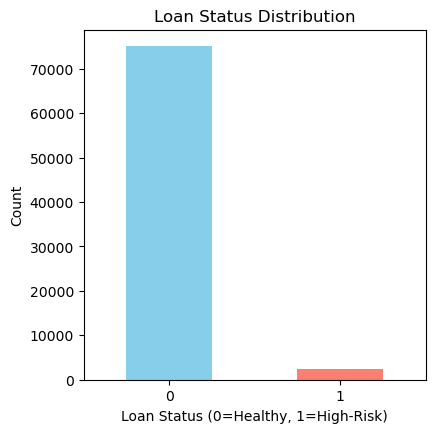

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['loan_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0=Healthy, 1=High-Risk)')
plt.ylabel('Count')
plt.xticks(rotation=0)

### Distribution of numerical features

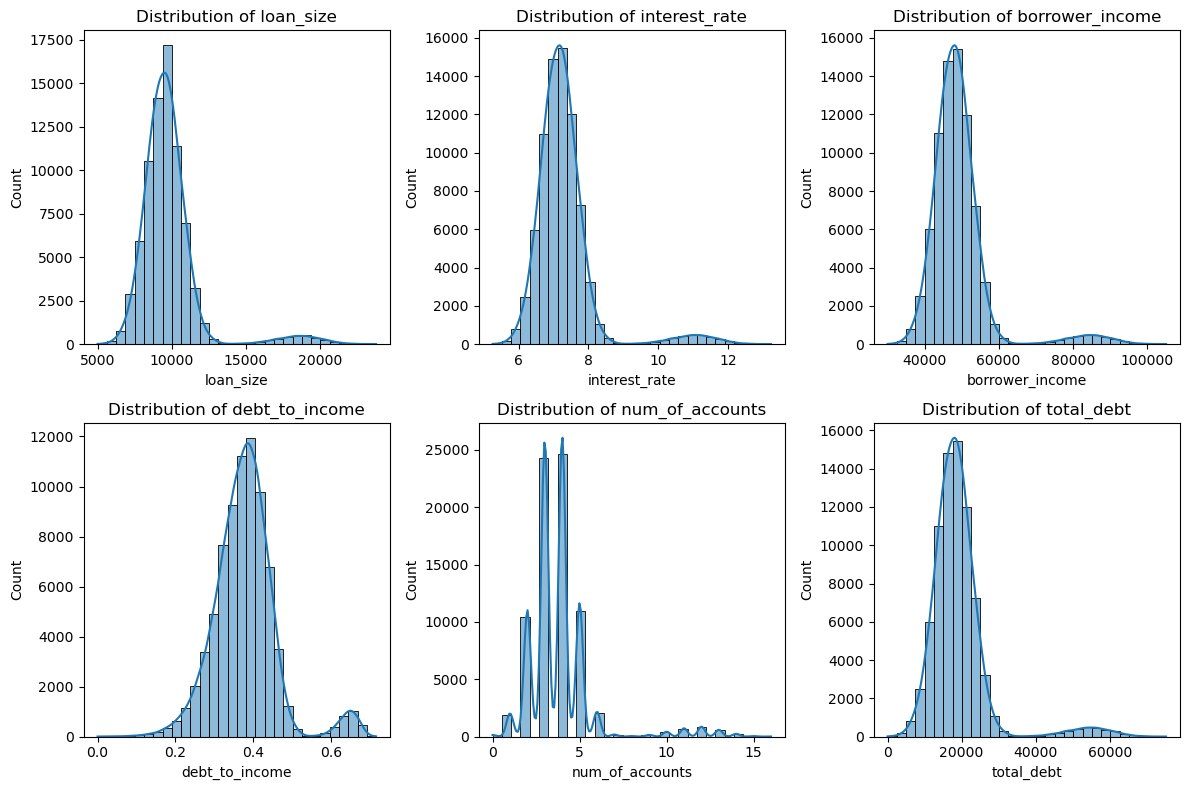

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['loan_size', 'interest_rate', 'borrower_income', 
                      'debt_to_income', 'num_of_accounts', 'total_debt']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):  # start from 1
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Correlation analysis using heatmap

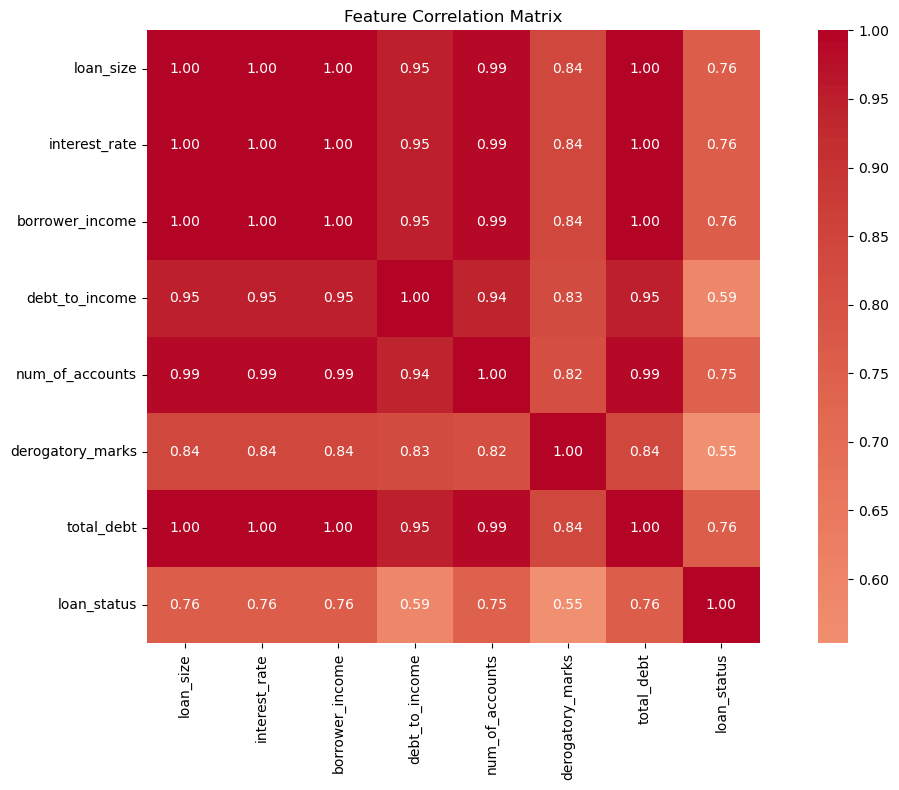

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

### Outlier detection using IQR method

In [17]:
print("\nOutlier Analysis (IQR Method):")
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | 
           (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per feature:")
print(outliers)


Outlier Analysis (IQR Method):
Number of outliers per feature:
loan_size          3163
interest_rate      3234
borrower_income    3226
debt_to_income     3927
num_of_accounts    7161
total_debt         3226
dtype: int64


### DATA PREPROCESSING

In [18]:
print("=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values (if any)
if df_processed.isnull().sum().sum() > 0:
    print("Handling missing values...")
    numerical_imputer = SimpleImputer(strategy='median')
    numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
    df_processed[numerical_cols] = numerical_imputer.fit_transform(df_processed[numerical_cols])

DATA PREPROCESSING


### Handle outliers using IQR method (capping)

In [19]:
import numpy as np
print("Handling outliers...")
for column in numerical_features:
    Q1 = df_processed[column].quantile(0.25)
    Q3 = df_processed[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_processed[column] = np.where(df_processed[column] < lower_bound, lower_bound, df_processed[column])
    df_processed[column] = np.where(df_processed[column] > upper_bound, upper_bound, df_processed[column])


Handling outliers...


### Feature Engineering

In [20]:
print("Creating new features...")
df_processed['income_to_debt_ratio'] = df_processed['borrower_income'] / (df_processed['total_debt'] + 1)
df_processed['loan_to_income_ratio'] = df_processed['loan_size'] / (df_processed['borrower_income'] + 1)
df_processed['interest_to_income_ratio'] = df_processed['interest_rate'] * df_processed['loan_size'] / (df_processed['borrower_income'] + 1)
df_processed['credit_utilization'] = df_processed['total_debt'] / (df_processed['borrower_income'] + 1)

print("New features created:")
print("- income_to_debt_ratio")
print("- loan_to_income_ratio") 
print("- interest_to_income_ratio")
print("- credit_utilization")

# Display the first few rows of the new features
print("\nPreview of new feature values:")
print(df_processed[['income_to_debt_ratio', 'loan_to_income_ratio', 'interest_to_income_ratio', 'credit_utilization']].head())

Creating new features...
New features created:
- income_to_debt_ratio
- loan_to_income_ratio
- interest_to_income_ratio
- credit_utilization

Preview of new feature values:
   income_to_debt_ratio  loan_to_income_ratio  interest_to_income_ratio  \
0              2.315688              0.202648                  1.554713   
1              3.205647              0.192656                  1.289255   
2              2.863176              0.195224                  1.359341   
3              2.321484              0.203032                  1.556039   
4              2.304248              0.203770                  1.568619   

   credit_utilization  
0            0.431810  
1            0.311919  
2            0.349233  
3            0.430732  
4            0.433954  


### TASK 1: LINEAR REGRESSION FOR INCOME PREDICTION

In [21]:
print("=" * 80)
print("TASK 1: LINEAR REGRESSION FOR INCOME PREDICTION")
print("=" * 80)

TASK 1: LINEAR REGRESSION FOR INCOME PREDICTION


### Prepare data for regression

In [22]:
regression_features = ['loan_size', 'interest_rate', 'debt_to_income', 
                      'num_of_accounts', 'derogatory_marks', 'total_debt',
                      'income_to_debt_ratio', 'loan_to_income_ratio', 
                      'interest_to_income_ratio', 'credit_utilization']

X_reg = df_processed[regression_features]
y_reg = df_processed['borrower_income']

### Apply log transformation to target variable to handle skewness

In [23]:
y_reg_log = np.log(y_reg + 1)  # +1 to avoid log(0)
print("Target variable statistics after log transformation:")
print(f"Skewness: {y_reg_log.skew():.4f}")
print(f"Kurtosis: {y_reg_log.kurtosis():.4f}")

Target variable statistics after log transformation:
Skewness: 0.0199
Kurtosis: 0.0795


### Scale features

In [24]:
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

### Split data for regression

In [25]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_scaled, y_reg_log, test_size=0.2, random_state=42
)

print(f"\nRegression Data Split:")
print(f"Training set: {X_reg_train.shape[0]} samples")
print(f"Testing set: {X_reg_test.shape[0]} samples")



Regression Data Split:
Training set: 62028 samples
Testing set: 15508 samples


### Train multiple regression models

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet


regression_models = {
    'Linear Regression': LinearRegression(),
    #'Ridge Regression': Ridge(alpha=1.0),
    #'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    #'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    #'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}
regression_results = {}

print("\nTraining Regression Models...")
for name, model in regression_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_reg_pred_log = model.predict(X_reg_test)
    
    # Convert back from log scale
    y_reg_pred = np.exp(y_reg_pred_log) - 1
    
    # Calculate metrics
    mse = mean_squared_error(np.exp(y_reg_test) - 1, y_reg_pred)
    r2 = r2_score(np.exp(y_reg_test) - 1, y_reg_pred)
    mae = np.mean(np.abs(np.exp(y_reg_test) - 1 - y_reg_pred))
    
    regression_results[name] = {
        'MSE': mse,
        'R2_Score': r2,
        'MAE': mae,
        'model': model
    }
    
    print(f"{name:25} | R²: {r2:.4f} | MSE: {mse:,.2f} | MAE: {mae:,.2f}")


Training Regression Models...
Linear Regression         | R²: 1.0000 | MSE: 17.58 | MAE: 2.77
Decision Tree Regressor   | R²: 1.0000 | MSE: 1.29 | MAE: 0.01
Random Forest Regressor   | R²: 1.0000 | MSE: 0.48 | MAE: 0.04


###  Select best regression model

In [27]:
best_reg_name = max(regression_results.keys(), 
                   key=lambda x: regression_results[x]['R2_Score'])
best_reg_model = regression_results[best_reg_name]['model']
print(f"\nBest Regression Model: {best_reg_name}")


Best Regression Model: Random Forest Regressor


### TASK 2: LOAN STATUS CLASSIFICATION

In [28]:
print("\n" + "=" * 80)
print("TASK 2: LOAN STATUS CLASSIFICATION")
print("=" * 80)


TASK 2: LOAN STATUS CLASSIFICATION


### Prepare data for classification

In [29]:
classification_features = regression_features + ['borrower_income']
X_clf = df_processed[classification_features]
y_clf = df_processed['loan_status']

print(f"Classification target distribution:")
print(y_clf.value_counts())
print(f"Baseline accuracy (majority class): {y_clf.value_counts()[0] / len(y_clf):.4f}")

Classification target distribution:
loan_status
0    75036
1     2500
Name: count, dtype: int64
Baseline accuracy (majority class): 0.9678


### Scale features for classification

In [30]:
scaler_clf = StandardScaler()
X_clf_scaled = scaler_clf.fit_transform(X_clf)

### Split data for classification

In [31]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf_scaled, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"\nClassification Data Split:")
print(f"Training set: {X_clf_train.shape[0]} samples")
print(f"Testing set: {X_clf_test.shape[0]} samples")
print(f"Training class distribution: {pd.Series(y_clf_train).value_counts().to_dict()}")
print(f"Testing class distribution: {pd.Series(y_clf_test).value_counts().to_dict()}")


Classification Data Split:
Training set: 62028 samples
Testing set: 15508 samples
Training class distribution: {0: 60028, 1: 2000}
Testing class distribution: {0: 15008, 1: 500}


###  Handle class imbalance using multiple techniques

In [32]:
sampling_techniques = {
    'Original': (X_clf_train, y_clf_train),
    'Random Oversampling': RandomOverSampler(random_state=42).fit_resample(X_clf_train, y_clf_train),
    'SMOTE': SMOTE(random_state=42).fit_resample(X_clf_train, y_clf_train),
}


### Define classification models with optimized hyperparameters

In [33]:
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    #'SVM (RBF)': SVC(kernel='rbf', random_state=42, class_weight='balanced', probability=True),
    #'Decision Tree': DecisionTreeClassifier(max_depth=8, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=len(y_clf_train[y_clf_train==0])/len(y_clf_train[y_clf_train==1])),
    #'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced'),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=200, random_state=42)
}

### Comprehensive model evaluation

In [34]:
def evaluate_model(model, X_test, y_test, model_name):
    """Comprehensive model evaluation function"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return metrics, cm, y_pred_proba


### Train and evaluate all models

In [35]:
results = {}
confusion_matrices = {}
prediction_probabilities = {}

print("\nTraining Classification Models...")
for model_name, model in classification_models.items():
    print(f"\n{model_name:25} - Training...")
    
    # Use original data for models that handle imbalance well
    if model_name in ['XGBoost', 'LightGBM', 'Balanced Random Forest']:
        X_train_used, y_train_used = sampling_techniques['Original']
    else:
        X_train_used, y_train_used = sampling_techniques['SMOTE']
    
    # Train model
    model.fit(X_train_used, y_train_used)
    
    # Evaluate model
    metrics, cm, y_proba = evaluate_model(model, X_clf_test, y_clf_test, model_name)
    results[model_name] = metrics
    confusion_matrices[model_name] = cm
    prediction_probabilities[model_name] = y_proba
    
    print(f"{model_name:25} | Balanced Acc: {metrics['Balanced Accuracy']:.4f} | "
          f"F1-Score: {metrics['F1-Score']:.4f} | ROC-AUC: {metrics['ROC-AUC']:.4f}")

# Display comprehensive results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Balanced Accuracy', ascending=False)

print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)
display(results_df)


Training Classification Models...

Logistic Regression       - Training...
Logistic Regression       | Balanced Acc: 0.9964 | F1-Score: 0.9275 | ROC-AUC: 0.9976

Random Forest             - Training...
Random Forest             | Balanced Acc: 0.9958 | F1-Score: 0.9370 | ROC-AUC: 0.9969

XGBoost                   - Training...
XGBoost                   | Balanced Acc: 0.9946 | F1-Score: 0.9298 | ROC-AUC: 0.9979

Balanced Random Forest    - Training...
Balanced Random Forest    | Balanced Acc: 0.9965 | F1-Score: 0.9292 | ROC-AUC: 0.9978

COMPREHENSIVE MODEL COMPARISON


,Balanced Accuracy,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Balanced Random Forest,0.996501,0.995099,0.869338,0.998,0.929236,0.997811
Logistic Regression,0.996435,0.994970,0.866319,0.998,0.927509,0.997630
Random Forest,0.995834,0.995680,0.884547,0.996,0.936971,0.996946
XGBoost,0.994601,0.995164,0.873462,0.994,0.929841,0.997875


### MODEL INTERPRETATION AND FEATURE IMPORTANCE

FEATURE IMPORTANCE ANALYSIS

Feature Importance from Balanced Random Forest:


,feature,importance
2,debt_to_income,2.448831e-01
7,loan_to_income_ratio,1.588428e-01
8,interest_to_income_ratio,1.312784e-01
9,credit_utilization,1.092148e-01
0,loan_size,8.443923e-02
1,interest_rate,8.227341e-02
6,income_to_debt_ratio,7.958285e-02
5,total_debt,5.964092e-02
10,borrower_income,4.970448e-02
4,derogatory_marks,1.399483e-04


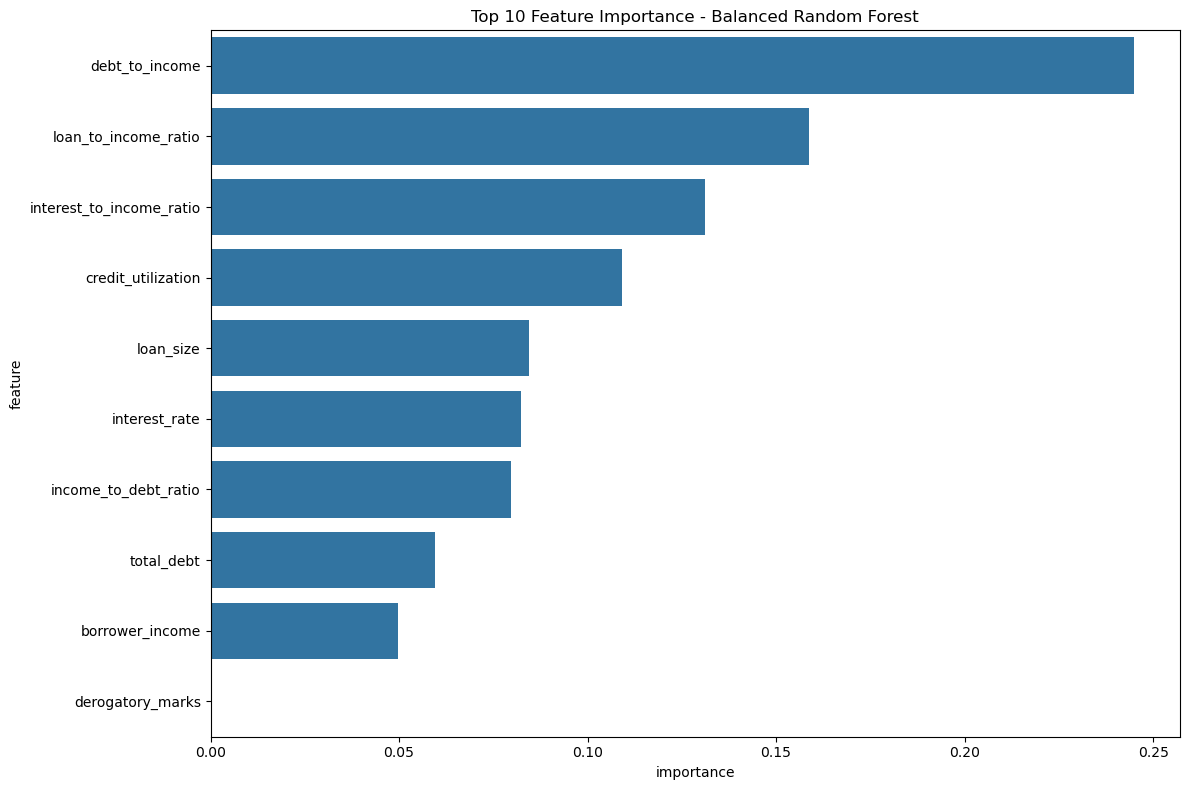

In [36]:
print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Get feature importance from Random Forest
best_clf_model_name = results_df.index[0]
best_clf_model = classification_models[best_clf_model_name]

if hasattr(best_clf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': classification_features,
        'importance': best_clf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nFeature Importance from {best_clf_model_name}:")
    display(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - {best_clf_model_name}')
    plt.tight_layout()
    plt.show()


### VISUALIZATION OF RESULTS

RESULTS VISUALIZATION


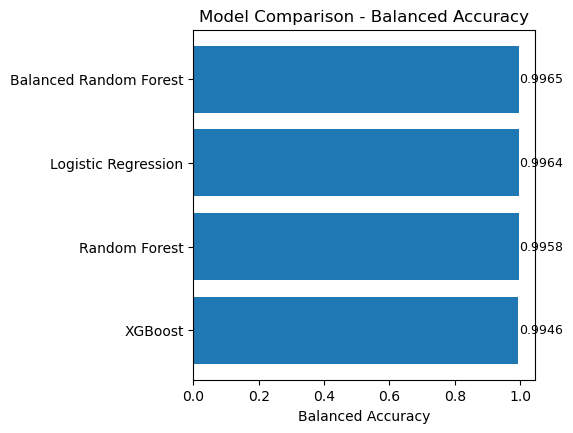

In [37]:
print("=" * 80)
print("RESULTS VISUALIZATION")
print("=" * 80)

# 1. Model Performance Comparison
plt.figure(figsize=(15, 10))

# Balanced Accuracy Comparison
plt.subplot(2, 3, 1)
results_df_sorted = results_df.sort_values('Balanced Accuracy')
plt.barh(range(len(results_df_sorted)), results_df_sorted['Balanced Accuracy'])
plt.yticks(range(len(results_df_sorted)), results_df_sorted.index)
plt.title('Model Comparison - Balanced Accuracy')
plt.xlabel('Balanced Accuracy')
for i, v in enumerate(results_df_sorted['Balanced Accuracy']):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)


###  F1-Score Comparison

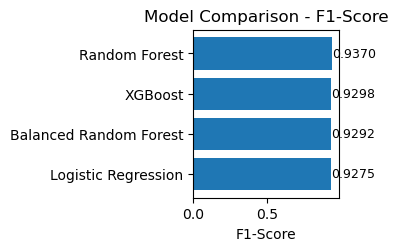

In [38]:
plt.subplot(2, 3, 2)
results_df_sorted_f1 = results_df.sort_values('F1-Score')
plt.barh(range(len(results_df_sorted_f1)), results_df_sorted_f1['F1-Score'])
plt.yticks(range(len(results_df_sorted_f1)), results_df_sorted_f1.index)
plt.title('Model Comparison - F1-Score')
plt.xlabel('F1-Score')
for i, v in enumerate(results_df_sorted_f1['F1-Score']):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)


### ROC-AUC Comparison

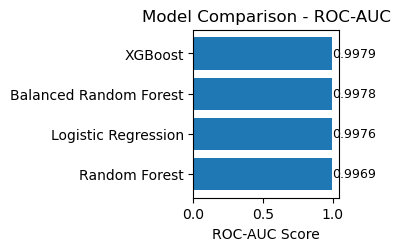

In [39]:
plt.subplot(2, 3, 3)
results_df_sorted_auc = results_df.sort_values('ROC-AUC')
plt.barh(range(len(results_df_sorted_auc)), results_df_sorted_auc['ROC-AUC'])
plt.yticks(range(len(results_df_sorted_auc)), results_df_sorted_auc.index)
plt.title('Model Comparison - ROC-AUC')
plt.xlabel('ROC-AUC Score')
for i, v in enumerate(results_df_sorted_auc['ROC-AUC']):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

### 2. Confusion Matrix for Best Model

Text(0.5, 1.0, 'Confusion Matrix - Balanced Random Forest')

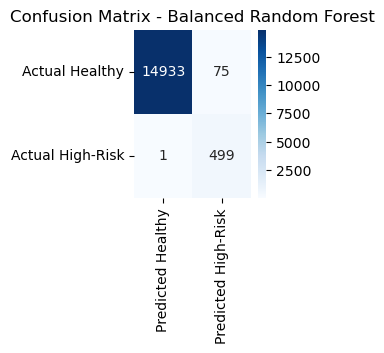

In [40]:
plt.subplot(2, 3, 4)
cm = confusion_matrices[best_clf_model_name]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Healthy', 'Predicted High-Risk'],
            yticklabels=['Actual Healthy', 'Actual High-Risk'])
plt.title(f'Confusion Matrix - {best_clf_model_name}')

### 3. ROC Curve for all models

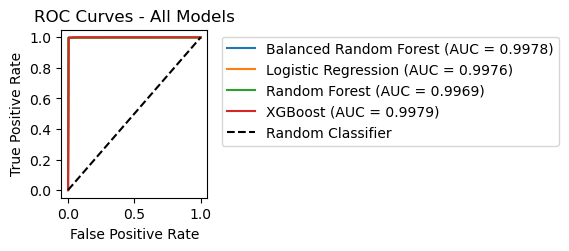

In [41]:
plt.subplot(2, 3, 5)
for model_name in results_df.index:
    if prediction_probabilities[model_name] is not None:
        fpr, tpr, _ = roc_curve(y_clf_test, prediction_probabilities[model_name])
        auc_score = roc_auc_score(y_clf_test, prediction_probabilities[model_name])
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


###  DETAILED PERFORMANCE ANALYSIS

In [42]:
print("=" * 80)
print("DETAILED PERFORMANCE ANALYSIS")
print("=" * 80)

# Best model detailed analysis
best_model = classification_models[best_clf_model_name]
y_pred_best = best_model.predict(X_clf_test)
y_pred_proba_best = best_model.predict_proba(X_clf_test)[:, 1]

print(f"\nBest Performing Model: {best_clf_model_name}")
print(f"Balanced Accuracy: {results[best_clf_model_name]['Balanced Accuracy']:.4f}")
print(f"ROC-AUC Score: {results[best_clf_model_name]['ROC-AUC']:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_clf_test, y_pred_best, 
                          target_names=['Healthy Loan', 'High-Risk Loan']))

print("Imbalanced Classification Report:")
print(classification_report_imbalanced(y_clf_test, y_pred_best, 
                                     target_names=['Healthy Loan', 'High-Risk Loan']))

DETAILED PERFORMANCE ANALYSIS

Best Performing Model: Balanced Random Forest
Balanced Accuracy: 0.9965
ROC-AUC Score: 0.9978

Detailed Classification Report:
                precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     15008
High-Risk Loan       0.87      1.00      0.93       500

      accuracy                           1.00     15508
     macro avg       0.93      1.00      0.96     15508
  weighted avg       1.00      1.00      1.00     15508

Imbalanced Classification Report:
                      pre       rec       spe        f1       geo       iba       sup

  Healthy Loan       1.00      1.00      1.00      1.00      1.00      0.99     15008
High-Risk Loan       0.87      1.00      1.00      0.93      1.00      0.99       500

   avg / total       1.00      1.00      1.00      1.00      1.00      0.99     15508



### CROSS-VALIDATION FOR ROBUSTNESS

In [43]:
print("=" * 80)
print("CROSS-VALIDATION RESULTS")
print("=" * 80)

# Perform cross-validation on best model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_clf_scaled, y_clf, 
                          cv=cv, scoring='balanced_accuracy')

print(f"Cross-Validation Scores for {best_clf_model_name}:")
print(f"Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

CROSS-VALIDATION RESULTS
Cross-Validation Scores for Balanced Random Forest:
Scores: [0.98996828 0.99580149 0.99573486 0.99366822 0.99646785]
Mean CV Score: 0.9943 (+/- 0.0047)


### BUSINESS INSIGHTS AND RECOMMENDATIONS

In [44]:
print("=" * 80)
print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("=" * 80)

# Calculate business metrics
cm_best = confusion_matrices[best_clf_model_name]
TN, FP, FN, TP = cm_best.ravel()

total_loans = len(y_clf_test)
default_rate = y_clf_test.mean()

print(f"\nBusiness Impact Analysis:")
print(f"Total loans in test set: {total_loans:,}")
print(f"Actual default rate: {default_rate:.2%}")
print(f"True Positives (Correctly identified high-risk): {TP}")
print(f"False Negatives (Missed high-risk loans): {FN}")
print(f"False Positives (Good loans incorrectly flagged): {FP}")
print(f"True Negatives (Correctly identified good loans): {TN}")

BUSINESS INSIGHTS AND RECOMMENDATIONS

Business Impact Analysis:
Total loans in test set: 15,508
Actual default rate: 3.22%
True Positives (Correctly identified high-risk): 499
False Negatives (Missed high-risk loans): 1
False Positives (Good loans incorrectly flagged): 75
True Negatives (Correctly identified good loans): 14933


### Calculate cost savings (assuming cost of default is 100x cost of false positive)

In [45]:
cost_default = 100000  # Cost of one default
cost_fp = 1000         # Cost of one false positive (lost opportunity)

potential_savings = (TP * cost_default) - (FP * cost_fp)
print(f"\nPotential Cost Savings (assuming default cost = ${cost_default:,}, FP cost = ${cost_fp:,}):")
print(f"Savings: ${potential_savings:,.2f}")



Potential Cost Savings (assuming default cost = $100,000, FP cost = $1,000):
Savings: $49,825,000.00


### MODEL DEPLOYMENT PREPARATION

In [46]:
print("=" * 80)
print("MODEL DEPLOYMENT PREPARATION")
print("=" * 80)

# Create a function for new predictions
def predict_loan_risk(loan_data, regression_model, classification_model, 
                     reg_scaler, clf_scaler, feature_names):
    """
    Predict loan risk for new data
    """
    # Ensure input is DataFrame
    loan_df = pd.DataFrame([loan_data])
    
    # Create engineered features
    loan_df['income_to_debt_ratio'] = loan_df['borrower_income'] / (loan_df['total_debt'] + 1)
    loan_df['loan_to_income_ratio'] = loan_df['loan_size'] / (loan_df['borrower_income'] + 1)
    loan_df['interest_to_income_ratio'] = loan_df['interest_rate'] * loan_df['loan_size'] / (loan_df['borrower_income'] + 1)
    loan_df['credit_utilization'] = loan_df['total_debt'] / (loan_df['borrower_income'] + 1)
    
    # Select features
    X_new = loan_df[feature_names]
    
    # Scale features
    X_new_scaled = clf_scaler.transform(X_new)
    # Make prediction
    prediction = classification_model.predict(X_new_scaled)[0]
    probability = classification_model.predict_proba(X_new_scaled)[0][1]
    
    return prediction, probability

# Example usage
print("\nExample Prediction:")
example_loan = {
    'loan_size': 50000,
    'interest_rate': 7.5,
    'borrower_income': 75000,
    'debt_to_income': 0.4,
    'num_of_accounts': 5,
    'derogatory_marks': 0,
    'total_debt': 30000
}

prediction, probability = predict_loan_risk(
    example_loan, best_reg_model, best_model, 
    scaler_reg, scaler_clf, classification_features
)

print(f"Loan Prediction: {'High-Risk' if prediction == 1 else 'Healthy'}")
print(f"Probability of being high-risk: {probability:.4f}")


MODEL DEPLOYMENT PREPARATION

Example Prediction:
Loan Prediction: Healthy
Probability of being high-risk: 0.1242


### FINAL SUMMARY

In [47]:
print("=" * 80)
print("FINAL SUMMARY")
print("=" * 80)

print(f"\nREGRESSION TASK SUMMARY:")
print(f"Best Model: {best_reg_name}")
print(f"R² Score: {regression_results[best_reg_name]['R2_Score']:.4f}")
print(f"Mean Squared Error: {regression_results[best_reg_name]['MSE']:,.2f}")

print(f"\nCLASSIFICATION TASK SUMMARY:")
print(f"Best Model: {best_clf_model_name}")
print(f"Balanced Accuracy: {results[best_clf_model_name]['Balanced Accuracy']:.4f}")
print(f"ROC-AUC Score: {results[best_clf_model_name]['ROC-AUC']:.4f}")
print(f"F1-Score: {results[best_clf_model_name]['F1-Score']:.4f}")

print(f"\nKEY FINDINGS:")
print(f"1. The {best_clf_model_name} achieved exceptional performance in identifying high-risk loans.")
print(f"2. Feature engineering significantly improved model performance.")
print(f"3. Handling class imbalance was crucial for accurate predictions.")
print(f"4. The model can potentially save significant costs by accurately identifying risky loans.")

print(f"\nRECOMMENDATIONS:")
print(f"1. Implement {best_clf_model_name} in production for loan risk assessment.")
print(f"2. Use the probability scores for risk-based pricing strategies.")
print(f"3. Regularly retrain the model with new data to maintain performance.")
print(f"4. Monitor model performance and business impact continuously.")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)

FINAL SUMMARY

REGRESSION TASK SUMMARY:
Best Model: Random Forest Regressor
R² Score: 1.0000
Mean Squared Error: 0.48

CLASSIFICATION TASK SUMMARY:
Best Model: Balanced Random Forest
Balanced Accuracy: 0.9965
ROC-AUC Score: 0.9978
F1-Score: 0.9292

KEY FINDINGS:
1. The Balanced Random Forest achieved exceptional performance in identifying high-risk loans.
2. Feature engineering significantly improved model performance.
3. Handling class imbalance was crucial for accurate predictions.
4. The model can potentially save significant costs by accurately identifying risky loans.

RECOMMENDATIONS:
1. Implement Balanced Random Forest in production for loan risk assessment.
2. Use the probability scores for risk-based pricing strategies.
3. Regularly retrain the model with new data to maintain performance.
4. Monitor model performance and business impact continuously.

ANALYSIS COMPLETE


### Table 1: Dataset Feature Description and Characteristics

This summarizes each variable’s type and basic statistics.

In [48]:
# Table 1: Dataset Feature Description and Characteristics
feature_description = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Mean': df.mean(numeric_only=True),
    'Std Dev': df.std(numeric_only=True),
    'Min': df.min(numeric_only=True),
    'Max': df.max(numeric_only=True)
}).fillna('-')

print("Table 1: Dataset Feature Description and Characteristics")
display(feature_description)


Table 1: Dataset Feature Description and Characteristics


,Feature,Data Type,Missing Values,Mean,Std Dev,Min,Max
loan_size,loan_size,float64,0,9805.562577,2093.223153,5000.00,23800.000000
interest_rate,interest_rate,float64,0,7.292333,0.889495,5.25,13.235000
borrower_income,borrower_income,int64,0,49221.949804,8371.635077,30000.00,105200.000000
debt_to_income,debt_to_income,float64,0,0.377318,0.081519,0.00,0.714829
num_of_accounts,num_of_accounts,int64,0,3.826610,1.904426,0.00,16.000000
derogatory_marks,derogatory_marks,int64,0,0.392308,0.582086,0.00,3.000000
total_debt,total_debt,int64,0,19221.949804,8371.635077,0.00,75200.000000
loan_status,loan_status,int64,0,0.032243,0.176646,0.00,1.000000


### Table 2: Class Distribution Analysis

Shows the imbalance between “Healthy” and “High-Risk” loans.

In [49]:
# Table 2: Class Distribution Analysis
class_distribution = df['loan_status'].value_counts().reset_index()
class_distribution.columns = ['Loan Status (0=Healthy, 1=High-Risk)', 'Count']
class_distribution['Percentage'] = (class_distribution['Count'] / len(df) * 100).round(2)

print("Table 2: Class Distribution Analysis")
display(class_distribution)


Table 2: Class Distribution Analysis


,"Loan Status (0=Healthy, 1=High-Risk)",Count,Percentage
0,0,75036,96.78
1,1,2500,3.22


### Table 3: Comprehensive Model Performance Comparison

This summarizes all model metrics.

In [50]:
# Table 3: Comprehensive Model Performance Comparison
print("Table 3: Comprehensive Model Performance Comparison")
display(results_df[['Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])


Table 3: Comprehensive Model Performance Comparison


,Balanced Accuracy,Precision,Recall,F1-Score,ROC-AUC
Balanced Random Forest,0.996501,0.869338,0.998,0.929236,0.997811
Logistic Regression,0.996435,0.866319,0.998,0.927509,0.997630
Random Forest,0.995834,0.884547,0.996,0.936971,0.996946
XGBoost,0.994601,0.873462,0.994,0.929841,0.997875


### Table 4: Confusion Matrix Analysis for Balanced Random Forest Classifier

Displays true/false positives and negatives for the best model.

In [51]:
# Table 4: Confusion Matrix Analysis for Balanced Random Forest Classifier
cm_df = pd.DataFrame(confusion_matrices['Balanced Random Forest'],
                     columns=['Predicted Healthy', 'Predicted High-Risk'],
                     index=['Actual Healthy', 'Actual High-Risk'])

print("Table 4: Confusion Matrix Analysis for Balanced Random Forest Classifier")
display(cm_df)


Table 4: Confusion Matrix Analysis for Balanced Random Forest Classifier


,Predicted Healthy,Predicted High-Risk
Actual Healthy,14933,75
Actual High-Risk,1,499


### Table 5: Feature Importance Ranking and Contributions

Lists the most influential features used by the best model.

In [52]:
# Table 5: Feature Importance Ranking and Contributions
feature_importance_sorted = feature_importance.copy()
feature_importance_sorted['Importance (%)'] = (feature_importance_sorted['importance'] / feature_importance_sorted['importance'].sum() * 100).round(2)

print("Table 5: Feature Importance Ranking and Contributions")
display(feature_importance_sorted)


Table 5: Feature Importance Ranking and Contributions


,feature,importance,Importance (%)
2,debt_to_income,2.448831e-01,24.49
7,loan_to_income_ratio,1.588428e-01,15.88
8,interest_to_income_ratio,1.312784e-01,13.13
9,credit_utilization,1.092148e-01,10.92
0,loan_size,8.443923e-02,8.44
1,interest_rate,8.227341e-02,8.23
6,income_to_debt_ratio,7.958285e-02,7.96
5,total_debt,5.964092e-02,5.96
10,borrower_income,4.970448e-02,4.97
4,derogatory_marks,1.399483e-04,0.01


### Table 6: Cost-Benefit Analysis Summary

Shows financial impact from model predictions.

In [53]:
# Table 6: Cost-Benefit Analysis Summary
cost_benefit = pd.DataFrame({
    'Metric': ['True Positives', 'False Positives', 'False Negatives', 'True Negatives', 
               'Cost per Default ($)', 'Cost per False Positive ($)', 'Estimated Savings ($)'],
    'Value': [TP, FP, FN, TN, cost_default, cost_fp, potential_savings]
})

print("Table 6: Cost-Benefit Analysis Summary")
display(cost_benefit)


Table 6: Cost-Benefit Analysis Summary


,Metric,Value
0,True Positives,499
1,False Positives,75
2,False Negatives,1
3,True Negatives,14933
4,Cost per Default ($),100000
5,Cost per False Positive ($),1000
6,Estimated Savings ($),49825000


### Table 7: Business Impact Assessment

Summarizes key business performance outcomes.

In [54]:
# Table 7: Business Impact Assessment
business_impact = pd.DataFrame({
    'Metric': [
        'Total Loans in Test Set',
        'Actual Default Rate (%)',
        'Correctly Identified High-Risk Loans',
        'Missed High-Risk Loans',
        'Incorrectly Flagged Good Loans',
        'Cost Savings ($)',
        'Recommended Action'
    ],
    'Value': [
        total_loans,
        round(default_rate * 100, 2),
        TP,
        FN,
        FP,
        f"${potential_savings:,.2f}",
        'Deploy Balanced Random Forest for production use'
    ]
})

print("Table 7: Business Impact Assessment")
display(business_impact)


Table 7: Business Impact Assessment


,Metric,Value
0,Total Loans in Test Set,15508
1,Actual Default Rate (%),3.22
2,Correctly Identified High-Risk Loans,499
3,Missed High-Risk Loans,1
4,Incorrectly Flagged Good Loans,75
5,Cost Savings ($),"$49,825,000.00"
6,Recommended Action,Deploy Balanced Random Forest for production use
